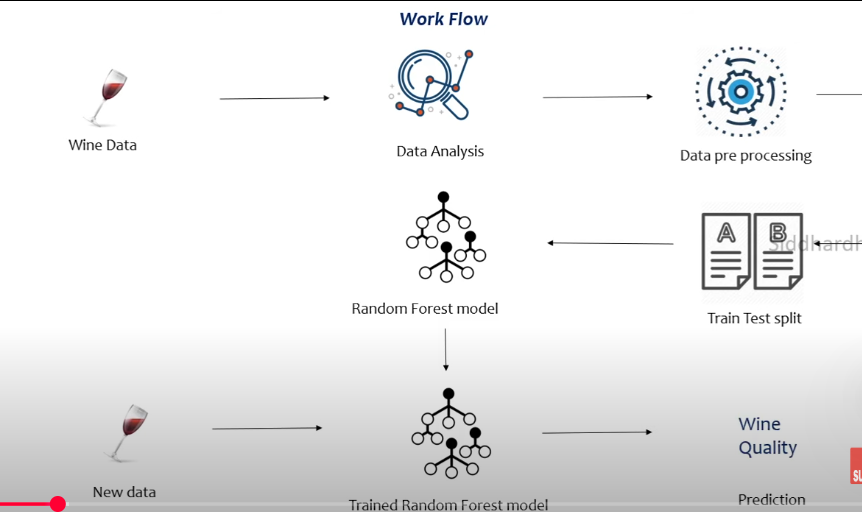

**Wine quality assessment** is a critical task in the wine industry, traditionally performed by professional tasters. However, this process is subjective, time-consuming, and costly. With the rise of data-driven technologies, machine learning provides a powerful alternative for predicting wine quality based on its physicochemical properties such as acidity, sugar content, pH, and alcohol level.

In this project, we apply machine learning techniques to build a model that can automatically predict the quality of red or white wine using data from the UCI Machine Learning Repository.



This project not only demonstrates the power of machine learning in real-world applications but also highlights how AI can enhance decision-making processes in traditional industries such as winemaking.

In [ ]:
#importing the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Data Collection

In [ ]:
#loading the csv dataset to a Pandas dataframe
wine_data=pd.read_csv('/content/winequality-red.csv')

In [ ]:
#printing the total number of rows of the dataset
wine_data.shape

(1599, 12)

In [ ]:
#printing the first 5 rows of the dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#checking for null values in the dataset
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
#getting some info about the data
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Data Analysis and Visualization

In [ ]:
#statistical measures of the dataset
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Quality Distribution Plot**

<ipython-input-17-e269c046c28a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine_data, palette='magma')


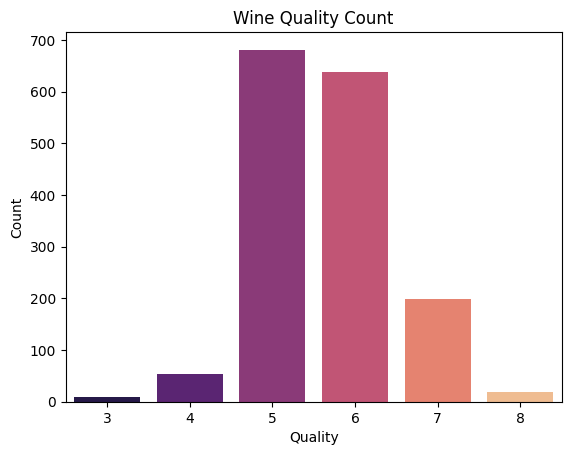

In [ ]:
#number of values for each quality

sns.countplot(x='quality', data=wine_data, palette='magma')
plt.title('Wine Quality Count')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


**Correlation Heatmap**

Shows how features relate to each other and to the target quality.

1.Posititve Correlation

2.Negative Correlation

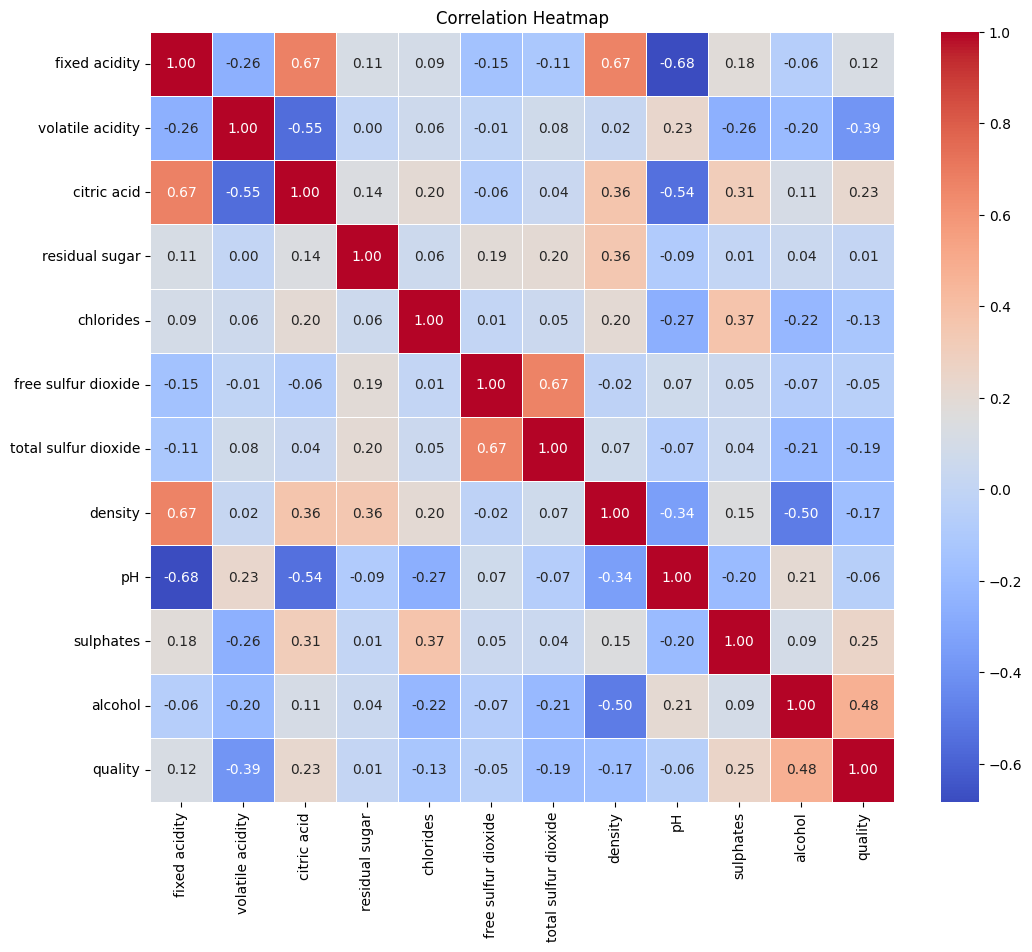

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Each square in the heatmap shows the correlation between two features from your wine_data dataset.

If a square is dark red (near +1) → strong positive correlation

If it's dark blue (near -1) → strong negative correlation

If it's light or white (near 0) → little or no correlation

The numbers (annot=True) show the exact correlation values, rounded to 2 decimals.



alcohol has a positive correlation with quality → higher alcohol often means better wine.

volatile acidity has a negative correlation with quality → higher acidity may lower quality.

citric acid and fixed acidity are highly correlated → related chemically.

**Alcohol vs Quality**

Checking if more alcohol leads to better wine

<ipython-input-20-102faa486af4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=wine_data, palette='viridis')


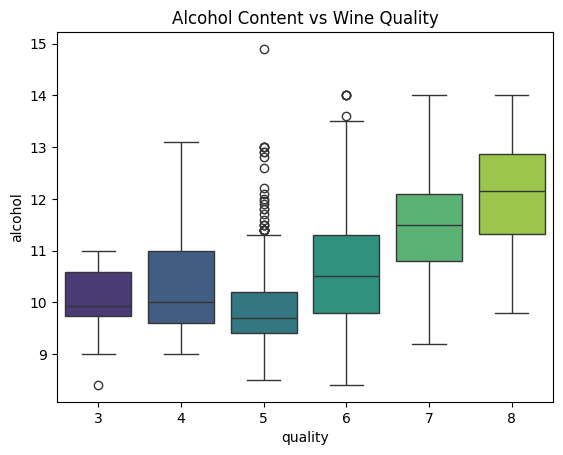

In [ ]:
sns.boxplot(x='quality', y='alcohol', data=wine_data, palette='viridis')
plt.title('Alcohol Content vs Wine Quality')
plt.show()

**Volatile Acidity vs Quality**

Higher volatile acidity usually means lower quality

<ipython-input-22-3876c129da1b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='volatile acidity', data=wine_data, palette='coolwarm')


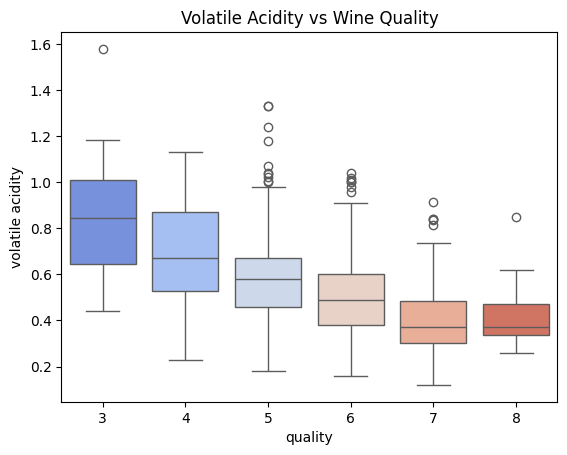

In [ ]:
sns.boxplot(x='quality', y='volatile acidity', data=wine_data, palette='coolwarm')
plt.title('Volatile Acidity vs Wine Quality')
plt.show()

**Quality vs Alcohol Scatter Plot**

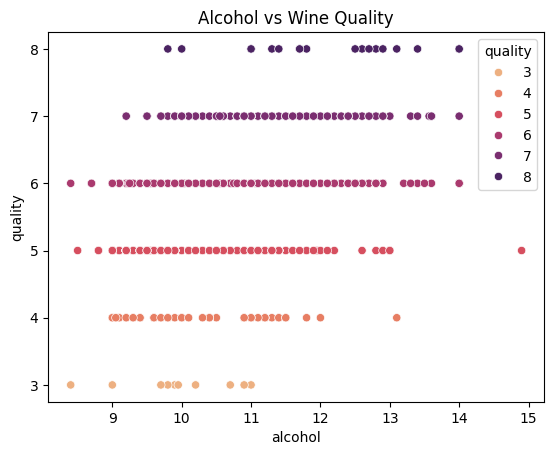

In [ ]:
sns.scatterplot(x='alcohol', y='quality', data=wine_data, hue='quality', palette='flare')
plt.title('Alcohol vs Wine Quality')
plt.show()

# Data Preprocessing

In [ ]:
#separate the data and label
X=wine_data.drop('quality', axis=1)
#label binarization
Y=wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

I am converting the original quality scores (which range from 3 to 8) into binary labels:

1 = Good quality wine (score ≥ 7)

0 = Not good wine (score < 7)

This turns the problem from a multi-class classification into a binary classification problem.

In [ ]:
print(X)
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# Train and Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
X.shape,X_train.shape,X_test.shape

((1599, 11), (1279, 11), (320, 11))

# Model Selection & Training:

**Random Forest Classifier**:

Random Forest is known for strong performance out-of-the-box. It works well with both numerical and categorical data, and handles complex datasets like wine quality very effectively.

So, to sum it up:

*   It’s accurate
*   Works with little preprocessing
*   Gives insightful feature importance
*   Resistant to overfitting










In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier()

# Model Evaluation

Accuracy score

In [ ]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)
print('Accuracy: ',test_data_accuracy)

Accuracy:  0.925


# Building a Predictive System

In [ ]:
input_data=(5.6,0.31,0.37,1.4,0.07400000000000001,12.0,96.0,0.9954,3.32,0.58,9.2,5)

#changing the input_data to a numpy array
input_data_As_numpy_array=np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance